In [9]:
data = read.table("subfigs/modisco_compare/combine_pd_benchmark.csv", sep=",")

In [10]:
data["V3"] = data["V3"]*100

In [11]:
head(data)

,V1,V2,V3
,<chr>,<chr>,<dbl>
1,IRF1,572M,17.630549
2,CTCF,572M,16.303281
3,SPIB,572M,14.599953
4,FOS+JUN,572M,8.313401
5,RUNX,572M,6.788425
6,NFKB,572M,6.509146


In [12]:
new_data = data[data["V2"]=="572M",]

In [13]:
new_data = aggregate(V3 ~ V1, new_data, sum)    


In [14]:
new_data[order(new_data$V3, decreasing=TRUE),"V1"]

[1] "IRF1"           "CTCF"           "SPIB"           "NFKB"          
 [5] "FOS+JUN"        "RUNX"           "ELK"            "SP1"           
 [9] "NFYB"           "ATF1"           "BATF"           "POU5F1"        
[13] "NRF1"           "PAX2"           "ETS-RUNX-Dimer" "COE1"

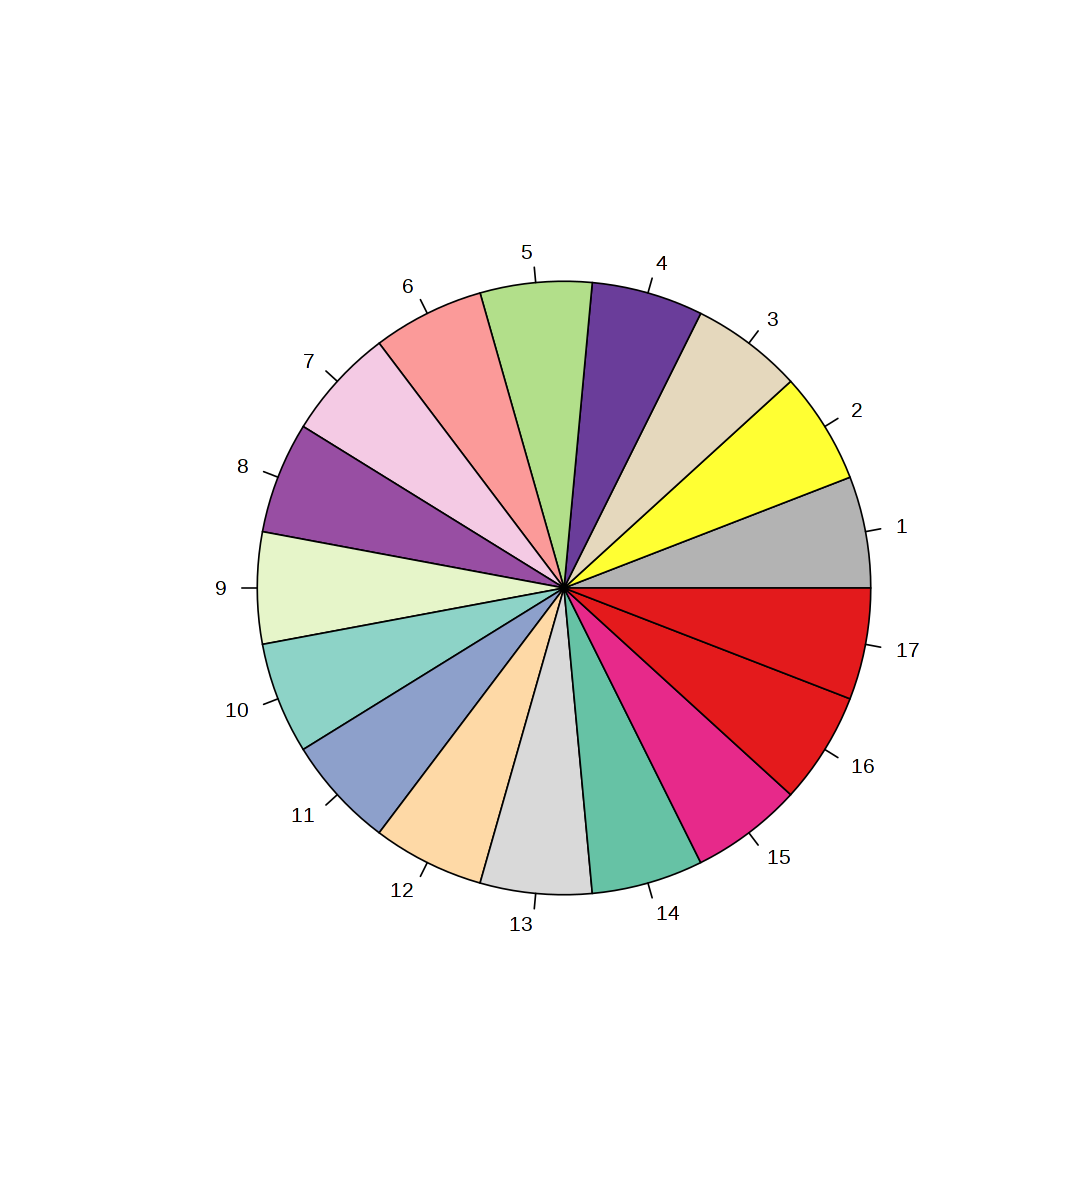

In [15]:
library(RColorBrewer)
n <- 17
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
pie(rep(1,n), col=sample(col_vector, n))

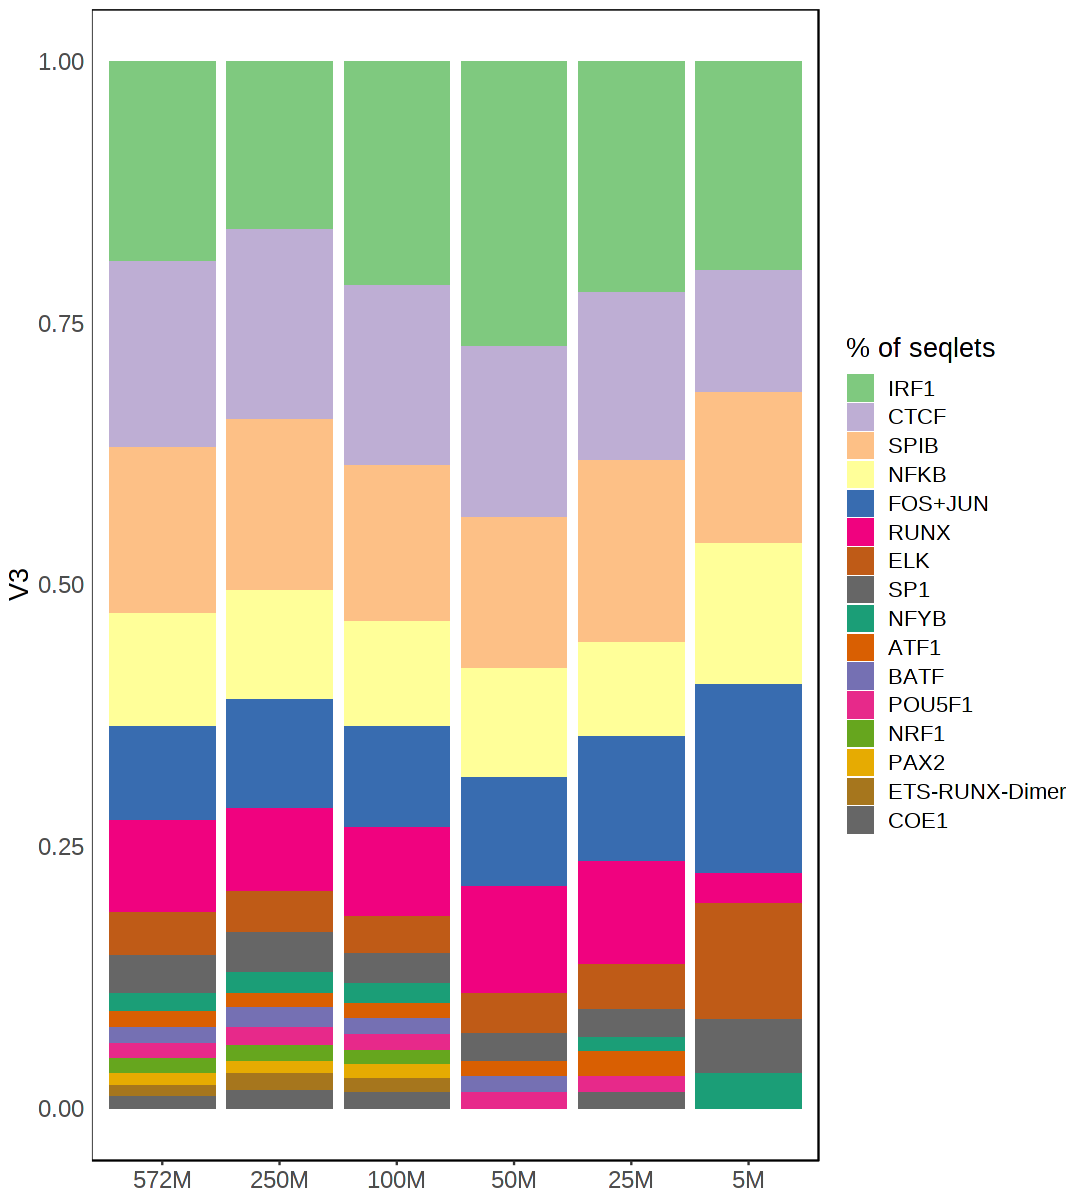

In [16]:
library(ggplot2)
#data
options(repr.plot.width = 9, repr.plot.height = 10)

ggplot(data, aes(x=V2, y=V3, fill=factor(V1, levels=new_data[order(new_data$V3, decreasing=TRUE),"V1"]))) +
geom_bar(position='fill', stat='identity') +
#geom_bar(position = position_fill(reverse = TRUE)) +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
    text = element_text(size=16),
    axis.line=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5, size=14),
    axis.text.y = element_text(size=14),
    panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +  scale_x_discrete(limits =c("572M","250M", "100M", "50M","25M","5M")) +
scale_fill_manual("legend", values = col_vector) +  guides(fill=guide_legend(title="% of seqlets", reverse=FALSE)) 
ggsave("subfigs/modisco_compare/modisco_distribution_subsampling.pdf", width=9, height=8)
